In [26]:
import numpy as np 
import h5py 
import matplotlib.pyplot as plt 

In [27]:
a = 6.99e7 # radius (m)
P = 9.925 * 3600 # rotation period (s)
R_dim = a / 2
gamma_dim = 2 * (2 * np.pi / P) / a**2
# Dimensionless parameters
L = 1e7 # m
U = 100 # m/s
T = L / U # s
F = 51.8 # = L**2 / Ld**2
gamma = gamma_dim * L**2 * T
R = R_dim / L

In [28]:
with h5py.File('EVP.h5', 'r') as f:
    print(f["tasks"].keys())
    psi1 = f["tasks/psi1"][:]
    psi2 = f["tasks/psi2"][:]
    evals = f["tasks/evals"][:]
    phi = f["tasks/phi"][:]
    r = f["tasks/r"][:]

print(evals.shape)

<KeysViewHDF5 ['evals', 'phi', 'psi1', 'psi2', 'r']>
(36, 5)


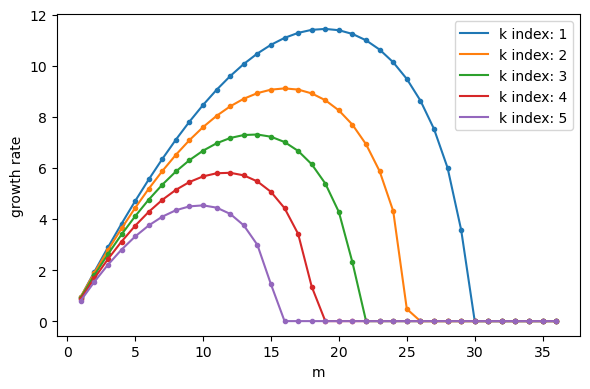

In [29]:
# plot dispersion relation
from scipy.special import jn_zeros
m_range = np.arange(1,37)
plt.figure(figsize=(6,4))
colors = ['C0','C1','C2','C3','C4','C5']
for n_zero in np.arange(1, 6):
    k = np.array([jn_zeros(mi,n_zero)[n_zero-1] / R for mi in m_range])
    a1 = k**4 + 2*F*k**2
    a2 = - 2 * ((k**2) + F) * gamma
    a3 = gamma**2 - (k**4) + 2 * F * (k**2)
    c = np.empty(a1.shape + (2,), dtype=np.complex128)
    for i in range(a1.shape[0]):
        c[i, :] = np.roots([a1[i], a2[i], a3[i]])
    s_dedalus = 1j * np.array(evals[:,n_zero-1])
    plt.plot(m_range, s_dedalus.imag, '.', color=colors[n_zero-1])
    plt.plot(m_range, m_range * c[:,0].imag, '-', color=colors[n_zero-1], label=f'k index: {n_zero}')
plt.legend()
plt.xlabel('m')
plt.ylabel(r'growth rate')
plt.tight_layout()
# plt.savefig('dispersion_relation_imag.pdf')



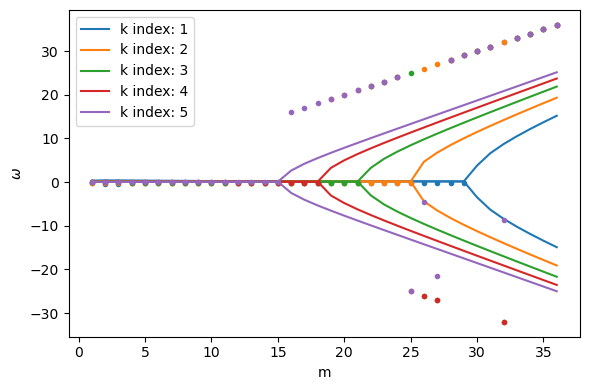

In [34]:
plt.figure(figsize=(6,4))
colors = ['C0','C1','C2','C3','C4','C5']
for n_zero in np.arange(1, 6):
    k = np.array([jn_zeros(mi,n_zero)[n_zero-1] / R for mi in m_range])
    a1 = k**4 + 2*F*k**2
    a2 = - 2 * ((k**2) + F) * gamma
    a3 = gamma**2 - (k**4) + 2 * F * (k**2)
    c = np.empty(a1.shape + (2,), dtype=np.complex128)
    for i in range(a1.shape[0]):
        c[i, :] = np.roots([a1[i], a2[i], a3[i]])
    s_dedalus = 1j * np.array(evals[:,n_zero-1])
    plt.plot(m_range, s_dedalus.real, '.', color=colors[n_zero-1])
    plt.plot(m_range, m_range * c[:,0].real, '-', color=colors[n_zero-1], label=f'k index: {n_zero}')
    plt.plot(m_range, m_range * c[:,1].real, '-', color=colors[n_zero-1])
plt.legend()
plt.xlabel('m')
plt.ylabel(r'$\omega$')
plt.tight_layout()
# plt.savefig('dispersion_relation_real.pdf')

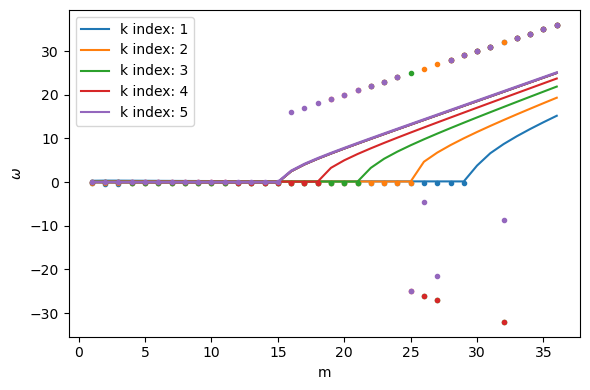

In [39]:
plt.figure(figsize=(6,4))
colors = ['C0','C1','C2','C3','C4','C5']
for n_zero in np.arange(1, 6):
    k = np.array([jn_zeros(mi,n_zero)[n_zero-1] / R for mi in m_range])
    a1 = k**4 + 2*F*k**2
    a2 = gamma*(F + k**2)
    a3 = k**8 + F**2*(gamma**2 - 4*k**4)
    c_mathematica = (a2 + np.sqrt(a3+0j)) / a1
    s_dedalus = 1j * np.array(evals[:,n_zero-1])
    plt.plot(m_range, s_dedalus.real, '.', color=colors[n_zero-1])
    plt.plot(m_range, m_range * c_mathematica.real, '-', color=colors[n_zero-1], label=f'k index: {n_zero}')
    plt.plot(m_range, -m_range * c[:,1].real, '-', color=colors[n_zero-1])
plt.legend()
plt.xlabel('m')
plt.ylabel(r'$\omega$')
plt.tight_layout()
# plt.savefig('dispersion_relation_real.pdf')

In [ ]:
m_sel = 19
k_sel = 1

